In [5]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [10]:
# Load dataset
df = pd.read_csv("heart_attack_dataset.csv")

# Display dataset info
print("Dataset Shape:", df.shape)
print("Dataset Columns:", df.columns)
print("\nMissing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)


Dataset Shape: (372974, 32)
Dataset Columns: Index(['Age', 'Gender', 'Cholesterol', 'BloodPressure', 'HeartRate', 'BMI',
       'Smoker', 'Diabetes', 'Hypertension', 'FamilyHistory',
       'PhysicalActivity', 'AlcoholConsumption', 'Diet', 'StressLevel',
       'Ethnicity', 'Income', 'EducationLevel', 'Medication', 'ChestPainType',
       'ECGResults', 'MaxHeartRate', 'ST_Depression', 'ExerciseInducedAngina',
       'Slope', 'NumberOfMajorVessels', 'Thalassemia', 'PreviousHeartAttack',
       'StrokeHistory', 'Residence', 'EmploymentStatus', 'MaritalStatus',
       'Outcome'],
      dtype='object')

Missing Values:
 Age                      0
Gender                   0
Cholesterol              0
BloodPressure            0
HeartRate                0
BMI                      0
Smoker                   0
Diabetes                 0
Hypertension             0
FamilyHistory            0
PhysicalActivity         0
AlcoholConsumption       0
Diet                     0
StressLevel              

In [17]:
# Identify categorical columns
categorical_cols = ["Gender", "Diet", "Ethnicity", "EducationLevel", "Medication",
                    "ChestPainType", "ECGResults", "ExerciseInducedAngina", "Slope",
                    "Thalassemia", "Residence", "EmploymentStatus", "MaritalStatus"]

# Encode categorical variables
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])


from sklearn.preprocessing import LabelEncoder

# Convert Outcome to numeric
label_encoder = LabelEncoder()
df["Outcome"] = label_encoder.fit_transform(df["Outcome"])

# Verify conversion
# print(df["Outcome"].unique())  # Check unique numeric values


# Handle missing values (if any)
# df.fillna(df.median(), inplace=True)

# Define target column
target_column = "Outcome"  # Ensure it's the correct target variable
X = df.drop(columns=[target_column])
y = df[target_column]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check data
print("Data prepared successfully!")
print("Feature set shape:", X_train.shape)
print("Target set shape:", y_train.shape)


Data prepared successfully!
Feature set shape: (298379, 31)
Target set shape: (298379,)


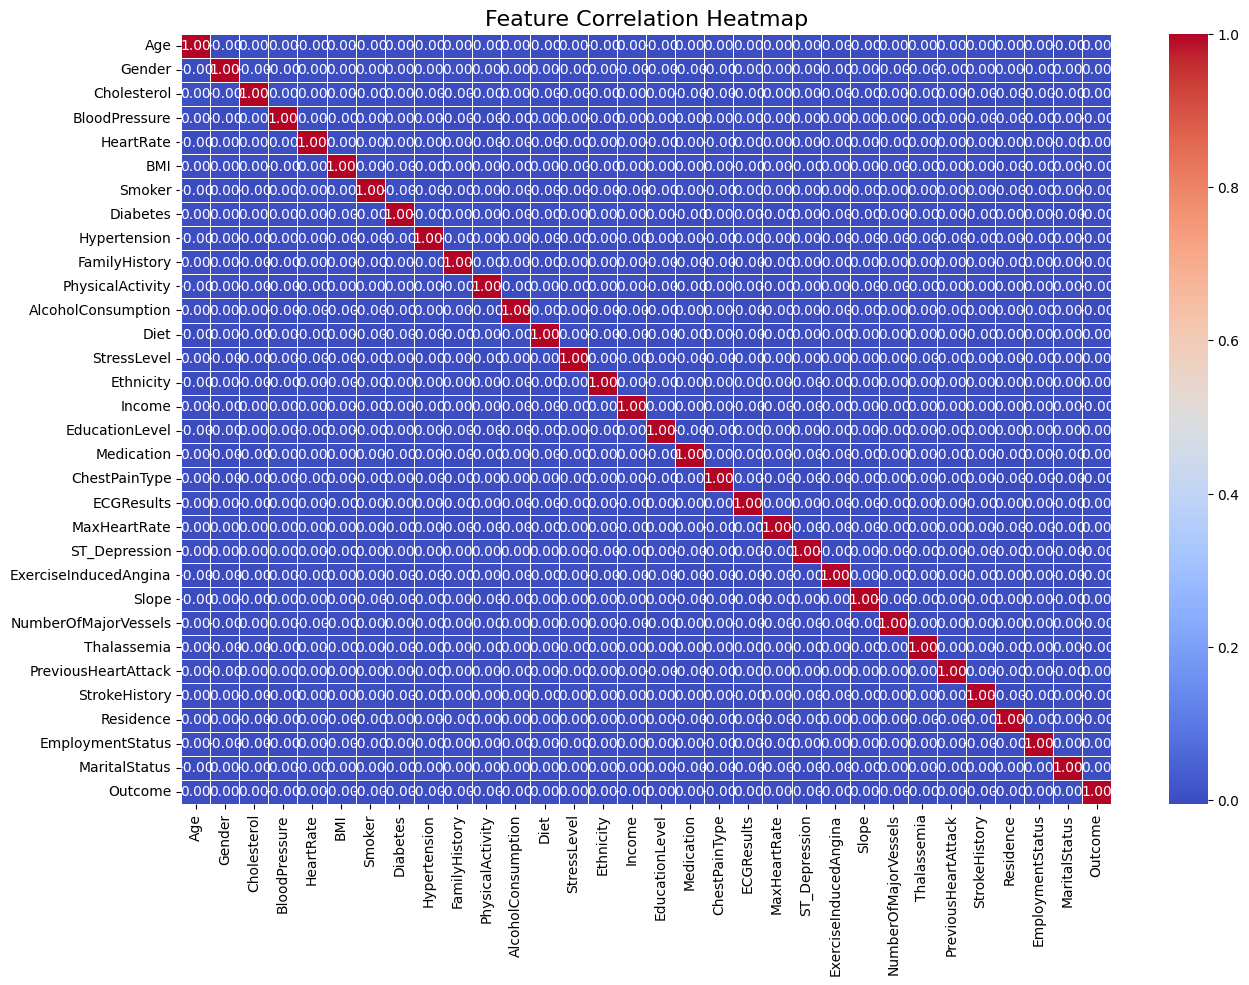

In [19]:
# Set figure size
plt.figure(figsize=(15,10))

# Compute correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Title
plt.title("Feature Correlation Heatmap", fontsize=16)

# Show plot
plt.show()


R-squared: -0.0001
MSE: 0.2500
MAE: 0.5000


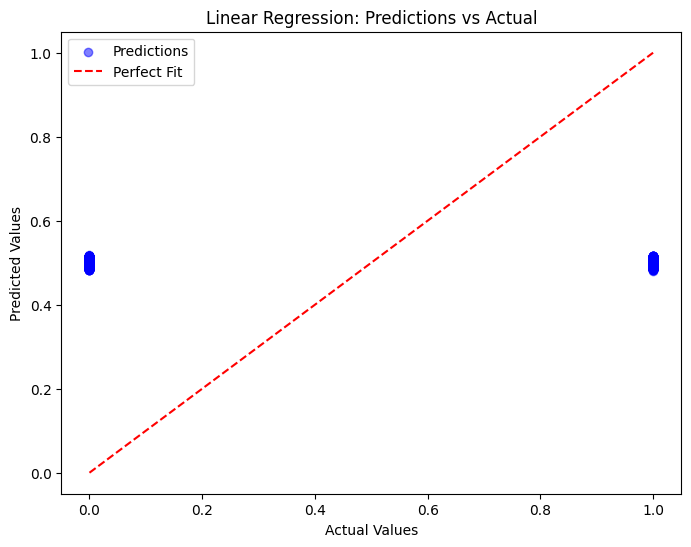

In [18]:
# Initialize Linear Regression Model
linear_reg = LinearRegression()

# Fit the model
linear_reg.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_reg.predict(X_test)

# Calculate Metrics
r2 = r2_score(y_test, y_pred_linear)
mse = mean_squared_error(y_test, y_pred_linear)
mae = mean_absolute_error(y_test, y_pred_linear)

# Print Metrics
print(f"R-squared: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")

# Plot Predictions vs Actual Values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_linear, alpha=0.5, color='blue', label="Predictions")
plt.plot(y_test, y_test, color='red', linestyle="dashed", label="Perfect Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Predictions vs Actual")
plt.legend()
plt.show()


R-squared: -0.0001
MSE: 0.2500
MAE: 0.5000


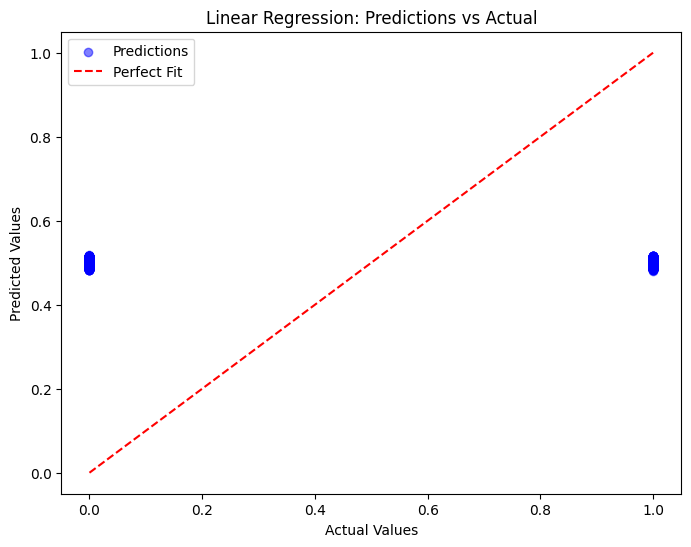

In [20]:
# Initialize Linear Regression Model
linear_reg = LinearRegression()

# Fit the model
linear_reg.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_reg.predict(X_test)

# Calculate Metrics
r2 = r2_score(y_test, y_pred_linear)
mse = mean_squared_error(y_test, y_pred_linear)
mae = mean_absolute_error(y_test, y_pred_linear)

# Print Metrics
print(f"R-squared: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")

# Plot Predictions vs Actual Values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_linear, alpha=0.5, color='blue', label="Predictions")
plt.plot(y_test, y_test, color='red', linestyle="dashed", label="Perfect Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Predictions vs Actual")
plt.legend()
plt.show()
